###  Unzip data

In [0]:
#IF TRAINING IN LOCALE
#import os
#import zipfile

#local_zip = 'dataHor.zip'
#zip_ref = zipfile.ZipFile(local_zip, 'r')
#zip_ref.extractall('/tmp/myData')
#zip_ref.close()

In [0]:
#IF TRAINING WITH GOOGLE COLABORATORY
# Run this cell to mount your Google Drive.
from google.colab import drive
import os
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#IF TRAINING WITH GOOGLE COLABORATORY
!unzip -uq drive/"My Drive"/draft/landingHor/dataHor.zip

In [0]:
#IF TRAINING WITH GOOGLE COLABORATORY
!unzip -uq drive/"My Drive"/draft/landingHor/testDataHor.zip

ImageGenerator will be used to read images from subdirectories, and automatically label them from the name of that subdirectory.


In [0]:
#CHANGE PATH IMAGES
train_trigger_dir = os.path.join('/content/dataHor/trigger')
train_up_dir = os.path.join('/content/dataHor/up')
train_down_dir = os.path.join('/content/dataHor/down')
train_right_dir = os.path.join('/content/dataHor/right')
train_left_dir = os.path.join('/content/dataHor/left')

In [22]:
train_trigger_names = os.listdir(train_trigger_dir)
print(train_trigger_names[:10])

train_up_names = os.listdir(train_up_dir)
print(train_up_names[:10])

train_down_names = os.listdir(train_down_dir)
print(train_down_names[:10])

train_right_names = os.listdir(train_right_dir)
print(train_right_names[:10])

train_left_names = os.listdir(train_left_dir)
print(train_left_names[:10])

['img__0_1568830007351914000.png', 'img__0_1568830010023820000.png', 'img__0_1568830004568617000.png', 'img__0_1568882453412764000.png', 'img__0_1568830007439241000.png', 'fvsd.png', 'img__0_1568830014036496000.png', 'img__0_1568897352083816000.png', 'img__0_1568897354518706000.png', 'img__0_1568830012909000000.png']
['img__0_1569312880590925000.png', 'img__0_1569312910053948000.png', 'img__0_1568835271223310000.png', 'img__0_1568835242149892000.png', 'img__0_1569312883619300000.png', 'img__0_1568835272653295000.png', 'img__0_1568882877460156000.png', 'img__0_1569312900492144000.png', 'img__0_1569312897286578000.png', 'img__0_1568882867764662000.png']
['img__0_1568827608510409000.png', 'img__0_1569313185011721000.png', 'img__0_1569313191668814000.png', 'img__0_1569313184884466000.png', 'img__0_1568827584920213000.png', 'img__0_1568882727901395000.png', 'img__0_1568882561091018000.png', 'img__0_1569313182299337000.png', 'img__0_1568827578313915000.png', 'img__0_1569313166946260000.png']

Total number of images in the directories:

In [23]:
print('total training trigger images:', len(os.listdir(train_trigger_dir)))
print('total training up images:', len(os.listdir(train_up_dir)))
print('total training down images:', len(os.listdir(train_down_dir)))
print('total training right images:', len(os.listdir(train_right_dir)))
print('total training left images:', len(os.listdir(train_left_dir)))

total training trigger images: 445
total training up images: 981
total training down images: 710
total training right images: 572
total training left images: 528


Printing same pictures


In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

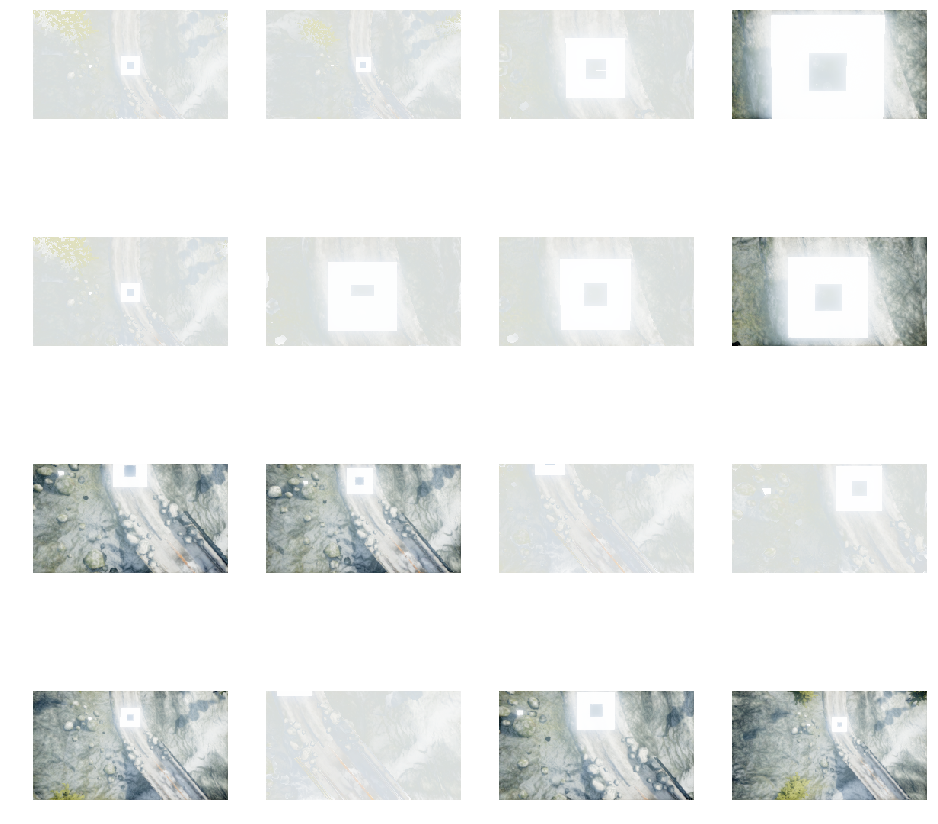

In [25]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_trigger_pix = [os.path.join(train_trigger_dir, fname) 
                for fname in train_trigger_names[pic_index-8:pic_index]]
next_up_pix = [os.path.join(train_up_dir, fname) 
                for fname in train_up_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_trigger_pix+next_up_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

## Building Model

In [0]:
import tensorflow as tf

Using softmax activation function to have outputs between 0 and 1, as probabilities.


In [0]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3), padding='same'),
    tf.keras.layers.MaxPooling2D(2, 2, padding='same'),
    # The third convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2,2, padding='same'),
    # The fifth convolution
    tf.keras.layers.Conv2D(8, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2,2, padding='same'),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [62]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 150, 150, 64)      1792      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 75, 75, 16)        9232      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 38, 38, 16)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 38, 38, 8)         1160      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 19, 19, 8)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 2888)             

 [Adam](https://wikipedia.org/wiki/Stochastic_gradient_descent#Adam)  automatically adapt the learning rate during training.

In [0]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

### Data Preprocessing

In [64]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

#CHANGE PATH IMAGES

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/content/dataHor/',  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=128,
        class_mode='categorical')

# Flow training images in batches of 128 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        '/content/testDataHor/',  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=128,
        class_mode='categorical')

Found 3235 images belonging to 5 classes.
Found 192 images belonging to 5 classes.


In [37]:
train_generator.class_indices

{'down': 0, 'left': 1, 'right': 2, 'trigger': 3, 'up': 4}

### Training


In [0]:
ACCURACY_THRESHOLD = 0.95
# Implement callback function to stop training
# when accuracy reaches e.g. ACCURACY_THRESHOLD = 0.95
class myCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if(logs.get('acc') > ACCURACY_THRESHOLD):   
            print("\nReached %2.2f%% accuracy, so stopping training!!" %(ACCURACY_THRESHOLD*100))   
            self.model.stop_training = True

In [0]:
import matplotlib.pyplot as plt
import numpy as np

def plot_history(history):
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel("Mean Abs Error [1000$]")
    plt.plot(history.epoch, np.array(history.history['acc']),
            label='Train Loss')
    plt.plot(history.epoch, np.array(history.history['val_acc']),
            label='Val Loss')
    plt.legend()
    plt.ylim([0,5])

Epoch 1/500
4/4 [==============================] - 5s 1s/step - loss: 1.6044 - acc: 0.2051 - val_loss: 1.5854 - val_acc: 0.1406
Epoch 2/500
4/4 [==============================] - 3s 639ms/step - loss: 1.6068 - acc: 0.3105 - val_loss: 1.6155 - val_acc: 0.1406
Epoch 3/500
4/4 [==============================] - 3s 636ms/step - loss: 1.5960 - acc: 0.3008 - val_loss: 1.6362 - val_acc: 0.1406
Epoch 4/500
4/4 [==============================] - 3s 639ms/step - loss: 1.5692 - acc: 0.3320 - val_loss: 1.7150 - val_acc: 0.1406
Epoch 5/500
4/4 [==============================] - 2s 457ms/step - loss: 1.5808 - acc: 0.2888 - val_loss: 1.6431 - val_acc: 0.1406
Epoch 6/500
4/4 [==============================] - 2s 481ms/step - loss: 1.5731 - acc: 0.3105 - val_loss: 1.6843 - val_acc: 0.1406
Epoch 7/500
4/4 [==============================] - 3s 757ms/step - loss: 1.5977 - acc: 0.2656 - val_loss: 1.6456 - val_acc: 0.1406
Epoch 8/500
4/4 [==============================] - 3s 637ms/step - loss: 1.5775 - acc:

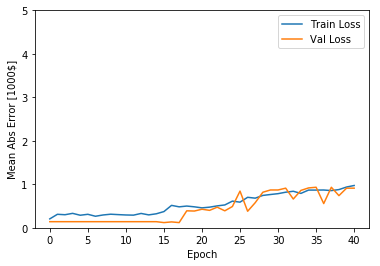

In [65]:
callbacks = myCallback()

history = model.fit_generator(
      train_generator,
      steps_per_epoch=4,  
      epochs=500,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=4,
      callbacks=[callbacks]
)
plot_history(history)

### Saving the model

In [56]:
#IF TRAINING WITH GOOGLE COLABORATORY
model.save("/tmp/model.h5")
#IF TRAINING IN LOCALE
#model.save("model.h5")
print("Model saved in disk")

Model saved in disk


### Running the Model


In [55]:
import numpy as np
from keras.preprocessing import image

#CHANGE PATH PICTURE
# predicting images
fn = '/content/testDataHor/trigger/img__0_1568836702966536000.png'
img = image.load_img(fn, target_size=(150, 150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=10)
print(classes[0])
 

[0. 0. 0. 1. 0.]


### Visualizing Intermediate Representations

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in true_divide


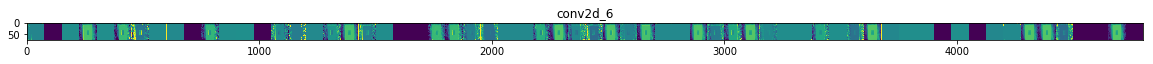

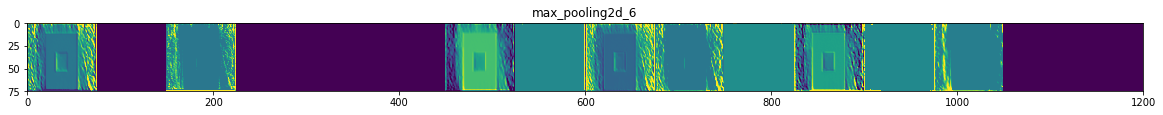

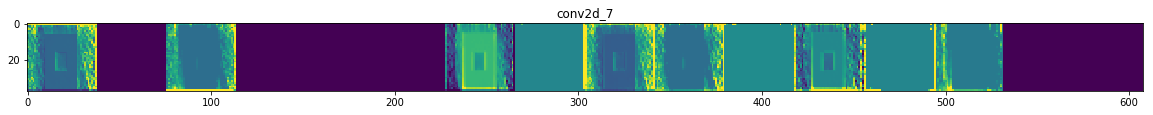

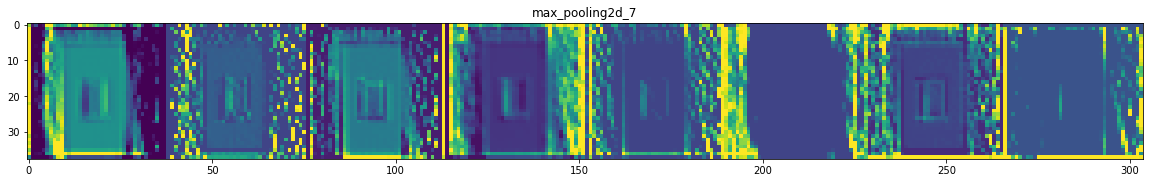

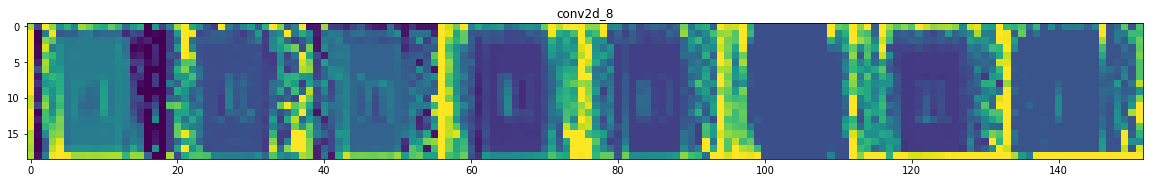

In [60]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
trigger_img_files = [os.path.join(train_trigger_dir, f) for f in train_trigger_names]
up_img_files = [os.path.join(train_up_dir, f) for f in train_up_names]
img_path = random.choice(trigger_img_files + up_img_files)

img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')